In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing Data**

In [ ]:
import pandas as pd
fake_ds = pd.read_csv('/content/drive/MyDrive/fake_news_datasets/Fake.csv')
real_ds = pd.read_csv('/content/drive/MyDrive/fake_news_datasets/True.csv')

In [ ]:
fake_ds.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
real_ds.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from wordcloud import WordCloud
from gensim.models import Word2Vec
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-m6ox_n9o
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-m6ox_n9o
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 96bf02872d9756f29d6cddb8aafaedcd2a39bbb4
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7603 sha256=494922c6efa6d2db145fcb668a6f620bac04d7fe55f38d152529e4e212cbc4d9
  Stored in directory: /tmp/pip-ephem-wheel-cache-5vaig4bg/wheels/5c/94/34/99d5ff65e88b8d9a6c5e8d8652f2311d87790a61a1b7466e21
Successfully built preprocess-kgptalkie
  Attempting uninstall: preprocess-kgptalkie
    Found existing installation: preprocess-kgptalkie 0.1.3
    Uninstalling preprocess-kgptalkie-0.1.3:
      Successfully uninstalled preprocess-kgptalkie-0.1.3


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import preprocess_kgptalkie as ps

In [ ]:
# Word2Vec and Tokenizer, both need splitted individual word
# Take a look on both data
fake_ds

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [ ]:
fake_ds.columns ##we need text combind with title column only

Index(['title', 'text', 'subject', 'date'], dtype='object')

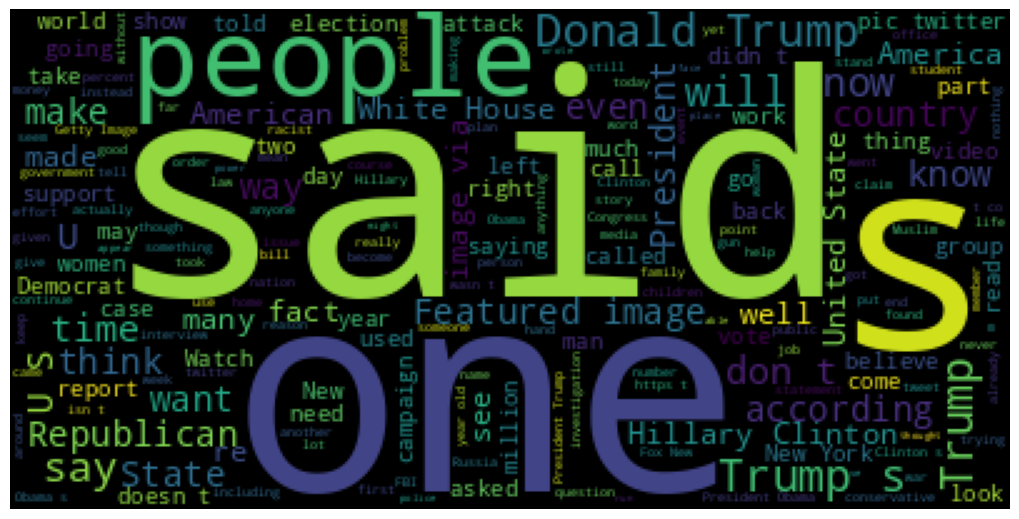

In [ ]:
fake_text = ' '.join(fake_ds.text.tolist())
wordcloud_fake = WordCloud().generate(fake_text)
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(wordcloud_fake)
plt.show()

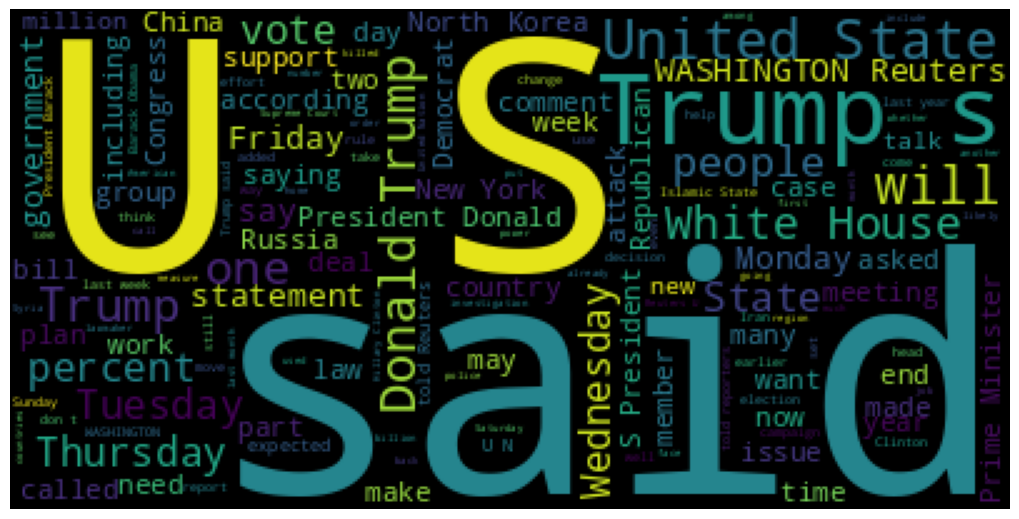

In [ ]:
real_text = ' '.join(real_ds.text.tolist())
wordcloud_fake = WordCloud().generate(real_text)
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(wordcloud_fake)
plt.show()

In [ ]:
# the preprocessing main part is real_ds
real_ds

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [ ]:
unknown_publisher = []

for index, row in enumerate(real_ds.text.values):
    try:
        record = row.split('-', maxsplit=1)
        record[1]

        assert(len(record[0])<120)
    except:
        unknown_publisher.append(index)

In [ ]:
publisher = []
text = []
for index, row in enumerate(real_ds.text.tolist()):
    if index in unknown_publisher:
        publisher.append('unknown')
        text.append(row)
    else:
        record = row.split('-', maxsplit=1)
        publisher.append(record[0])
        text.append(record[1])

In [ ]:
real_ds['text'] = text
real_ds['publisher'] = publisher

In [ ]:
real_ds

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fi...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links be...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos to...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Pos...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,NATO allies on Tuesday welcomed President Don...,worldnews,"August 22, 2017",BRUSSELS (Reuters)
21413,LexisNexis withdrew two products from Chinese ...,"LexisNexis, a provider of legal, regulatory a...",worldnews,"August 22, 2017",LONDON (Reuters)
21414,Minsk cultural hub becomes haven from authorities,In the shadow of disused Soviet-era factories...,worldnews,"August 22, 2017",MINSK (Reuters)
21415,Vatican upbeat on possibility of Pope Francis ...,Vatican Secretary of State Cardinal Pietro Pa...,worldnews,"August 22, 2017",MOSCOW (Reuters)


In [ ]:
real_ds['text'] = real_ds['title'] + ' : ' + real_ds['text']

In [ ]:
real_ds['label'] = 1
fake_ds['label'] = 0

In [ ]:
real_data = real_ds[['text', 'label']]
fake_data = fake_ds[['text', 'label']]

Real Data

In [ ]:
real_data

,text,label
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1
...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,1
21413,LexisNexis withdrew two products from Chinese ...,1
21414,Minsk cultural hub becomes haven from authorit...,1
21415,Vatican upbeat on possibility of Pope Francis ...,1


Fake Data

In [ ]:
fake_data

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
23476,21st Century Wire says As 21WIRE reported earl...,0
23477,21st Century Wire says It s a familiar theme. ...,0
23478,Patrick Henningsen 21st Century WireRemember ...,0
23479,21st Century Wire says Al Jazeera America will...,0


**COMBINE THE FAKE AND REAL DATA**

In [ ]:
data = real_data.append(fake_data)

<ipython-input-40-754929ed5e97>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = real_data.append(fake_data)


In [ ]:
data

,text,label
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1
...,...,...
23476,21st Century Wire says As 21WIRE reported earl...,0
23477,21st Century Wire says It s a familiar theme. ...,0
23478,Patrick Henningsen 21st Century WireRemember ...,0
23479,21st Century Wire says Al Jazeera America will...,0


In [ ]:
# Data Visualization
import plotly.express as px
class_dis = px.histogram(
    data_frame = data,
    y = "label",
    color = "label",
    title = "Fake & Real Samples Distribution",
    text_auto=True
    )
class_dis.update_layout(showlegend=False)
class_dis.show()

In [ ]:
data['text'] = data['text'].apply(lambda x:ps.remove_special_chars(x))


In [ ]:
data['text'] = data['text'].apply(lambda x:x.lower())


In [ ]:
data


,text,label
0,as us budget fight looms republicans flip thei...,1
1,us military to accept transgender recruits on ...,1
2,senior us republican senator let mr mueller do...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge much more...,1
...,...,...
23476,21st century wire says as 21wire reported earl...,0
23477,21st century wire says it s a familiar theme w...,0
23478,patrick henningsen 21st century wireremember w...,0
23479,21st century wire says al jazeera america will...,0


In [ ]:
## Word2Vec
x = [w.split() for w in data['text'].tolist()]
DIM=100
w2v_model = Word2Vec(sentences=x, window=5, min_count=1)

In [ ]:
len(w2v_model.wv)

228783

In [ ]:
w2v_model.wv['the']

array([ 1.7911379 , -0.23086372, -1.2384303 ,  0.41087487, -0.04847303,
       -0.17432329,  0.9885312 , -1.381359  , -0.19936675,  2.1544063 ,
        0.9801826 ,  0.81040865, -0.36999494,  2.192504  , -0.9478089 ,
        1.855237  ,  0.89092207, -1.1284126 ,  0.1605584 ,  0.7245316 ,
        3.2476208 ,  0.2860338 ,  1.225569  , -1.5010508 ,  1.0329179 ,
        1.2394263 ,  1.2832338 ,  0.11910871,  1.6482319 ,  0.21370089,
        1.6440533 , -1.9183382 , -1.1155337 , -0.83083296, -0.3960549 ,
       -1.7886214 ,  0.7419282 ,  0.02013973,  2.3721476 ,  0.870497  ,
       -0.81956345,  0.48219934,  0.5375499 , -0.37568343, -2.278334  ,
        1.4235444 , -2.7055788 ,  0.46141508, -1.2038699 , -1.3470327 ,
        0.4231823 ,  0.50537145, -2.0841286 , -1.2457424 , -0.94154805,
       -0.65247536, -0.19601114,  0.0532829 , -0.07003755,  1.5808731 ,
        0.9274005 ,  2.019521  , -1.2395371 ,  1.8678569 ,  0.9282163 ,
        3.3755949 , -0.7733084 ,  1.3425415 ,  0.9648181 , -0.87

In [ ]:
## check vector size
len(w2v_model.wv['the'])

100

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)
X = tokenizer.texts_to_sequences(x)

In [ ]:
len(tokenizer.word_index)

228783

In [ ]:
maxlen=1000
X = pad_sequences(X, maxlen=maxlen)

In [ ]:
## X defined
y = data['label']

# Data Splitiing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
def weight_matrix(model):
    weight_matrix = np.zeros((vocab_size, DIM))
    for word, index in tokenizer.word_index.items():
        weight_matrix[index] = model.wv[word]
    return weight_matrix

initial_weight_matrix = weight_matrix(w2v_model)

## **Building LSTM model**

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=100, input_length=1000, weights=[initial_weight_matrix], trainable=True))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         22878400  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 22995777 (87.72 MB)
Trainable params: 22995777 (87.72 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
842/842 [==============================] - 185s 214ms/step - loss: 0.1272 - acc: 0.9542 - val_loss: 0.0549 - val_acc: 0.9831
Epoch 2/5
842/842 [==============================] - 102s 121ms/step - loss: 0.0393 - acc: 0.9873 - val_loss: 0.0422 - val_acc: 0.9841
Epoch 3/5
842/842 [==============================] - 71s 85ms/step - loss: 0.0153 - acc: 0.9950 - val_loss: 0.0414 - val_acc: 0.9856
Epoch 4/5
842/842 [==============================] - 62s 73ms/step - loss: 0.0082 - acc: 0.9972 - val_loss: 0.0159 - val_acc: 0.9948
Epoch 5/5
842/842 [==============================] - 55s 65ms/step - loss: 0.0047 - acc: 0.9987 - val_loss: 0.0181 - val_acc: 0.9952


In [ ]:
y_pred = (model.predict(x_test)>=0.5).astype(int)

351/351 [==============================] - 6s 15ms/step


In [ ]:
print(y_pred)

[[0]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]


In [ ]:
def predict(data):
    tokenizer.fit_on_texts(data)
    data = tokenizer.texts_to_sequences(data)
    data = pad_sequences(data, maxlen=1000)

    if (model.predict(data)>=0.5).astype(int) == 1:
        return ('Real News')
    else:
        return ('Fake News')

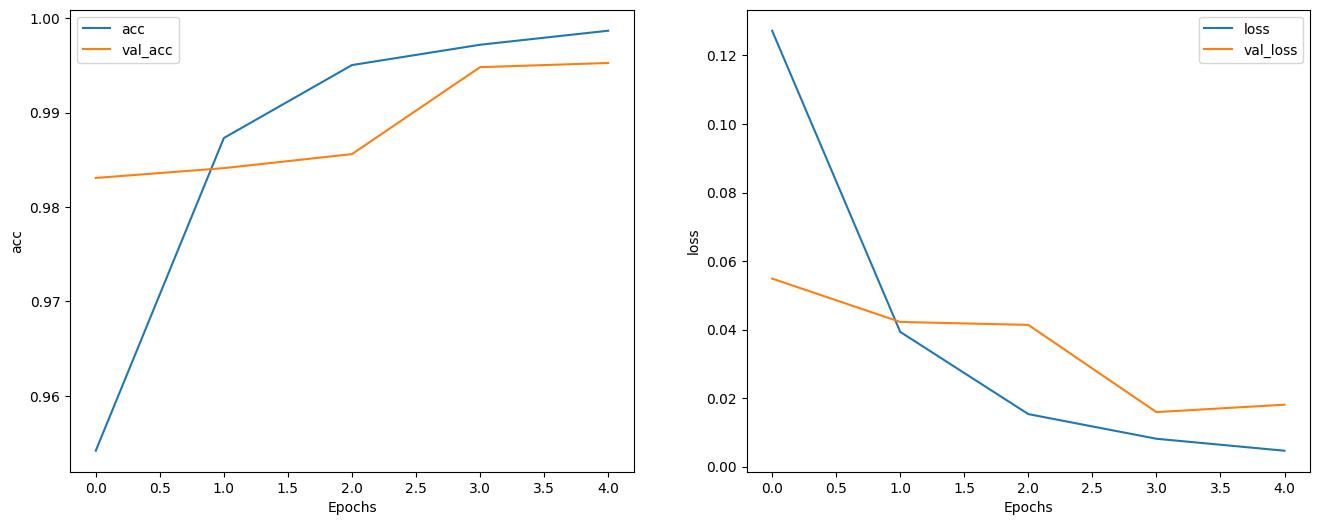

In [ ]:
# Modify the plot_graphs function to use 'acc' and 'val_acc'
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'acc')  # Use 'acc' instead of 'accuracy'
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')


## **Test Result**

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
# y_hat = model.predict(X_test_seq)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

351/351 [==============================] - 6s 16ms/step - loss: 0.0223 - acc: 0.9941
Test Loss: 0.022291110828518867
Test Accuracy: 0.9941202402114868


# Model Ploting

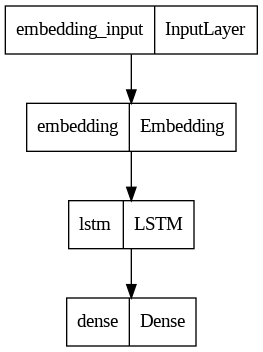

In [ ]:
tf.keras.utils.plot_model(model)


## **Modified LSTM Model**

In [ ]:
#add same model to add some layers on that
from keras.layers import Dropout  # Import the Dropout layer

model = Sequential()
model.add(Embedding(vocab_size, output_dim=100, input_length=1000, weights=[initial_weight_matrix], trainable=True))
model.add(LSTM(128))
model.add(Dropout(0.5))  # Add a Dropout layer with a dropout rate of 0.5
model.add(Dense(64, activation='relu'))  # Add an additional dense layer with 64 units and ReLU activation
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 100)         22878400  
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 23003969 (87.75 MB)
Trainable params: 23003969 (87.75 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
842/842 [==============================] - 141s 165ms/step - loss: 0.1412 - acc: 0.9490 - val_loss: 0.0662 - val_acc: 0.9807
Epoch 2/5
842/842 [==============================] - 84s 100ms/step - loss: 0.0481 - acc: 0.9854 - val_loss: 0.0402 - val_acc: 0.9857
Epoch 3/5
842/842 [==============================] - 63s 74ms/step - loss: 0.0398 - acc: 0.9882 - val_loss: 0.0555 - val_acc: 0.9853
Epoch 4/5
842/842 [==============================] - 52s 61ms/step - loss: 0.0188 - acc: 0.9941 - val_loss: 0.0240 - val_acc: 0.9936
Epoch 5/5
842/842 [==============================] - 51s 60ms/step - loss: 0.0048 - acc: 0.9987 - val_loss: 0.0266 - val_acc: 0.9950


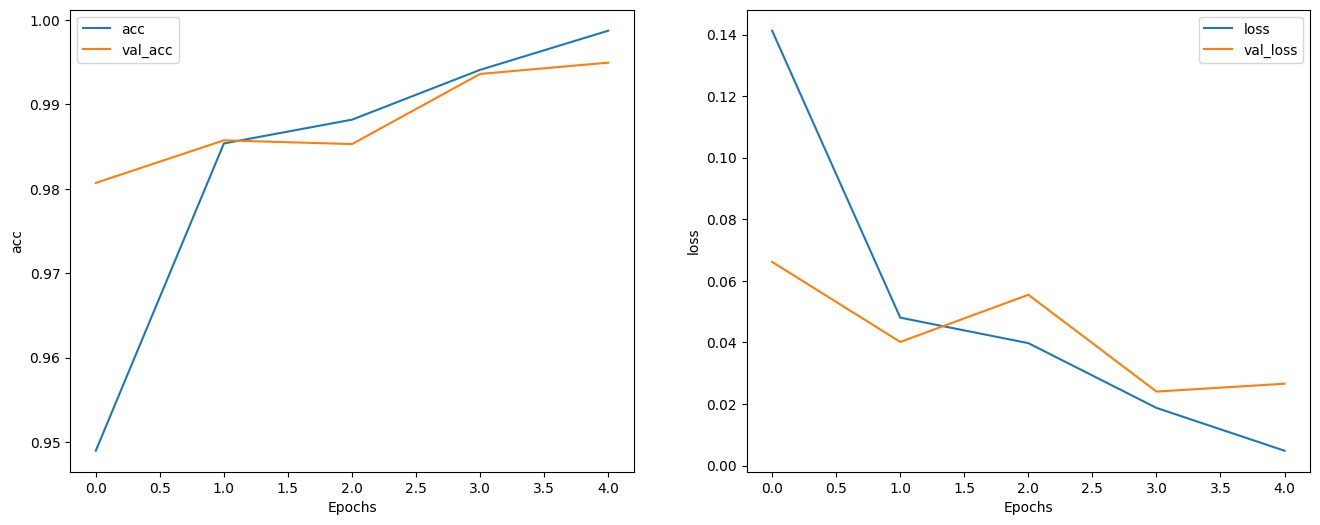

In [ ]:
# Modify the plot_graphs function to use 'acc' and 'val_acc'
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'acc')  # Use 'acc' instead of 'accuracy'
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')


## **Modified Model Test result**

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
# y_hat = model.predict(X_test_seq)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

351/351 [==============================] - 5s 14ms/step - loss: 0.0232 - acc: 0.9950
Test Loss: 0.023189781233668327
Test Accuracy: 0.9950111508369446


## **Modified Model Ploting**

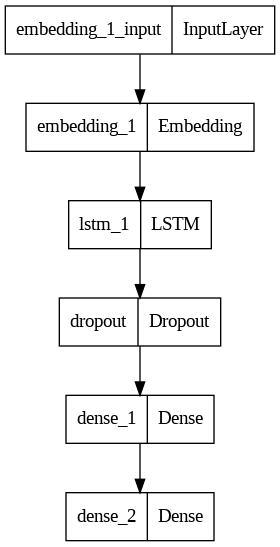

In [ ]:
tf.keras.utils.plot_model(model)


In [ ]:
#below prints confusion matrix

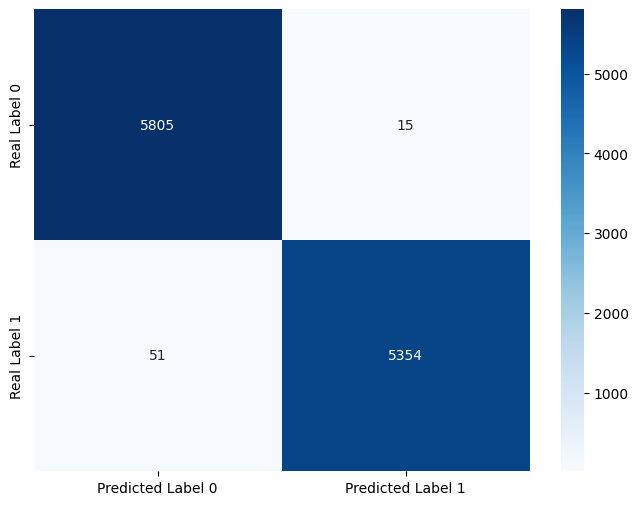

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, np.where(y_pred >= 0.5, 1, 0))

# Plot the confusion matrix.
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm,
            annot=True,
            fmt='',
            cmap='Blues',
            xticklabels=['Predicted Label 0', 'Predicted Label 1'],
            yticklabels=['Real Label 0', 'Real Label 1'])
ax.set_xlabel('')  # Remove x-axis label
ax.set_ylabel('')  # Remove y-axis label
plt.show()


In [ ]:
model.save("my_model.h5")  # Save the model to a file


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



## **Prediction**

In [2]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/fake_news_datasets/my_model.h5')


In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def predict(data):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(data)
    data = tokenizer.texts_to_sequences(data)
    data = pad_sequences(data, maxlen=1000)

    if (model.predict(data)>=0.5).astype(int) == 1:
        return ('Real News')
    else:
        return ('Fake News')

In [ ]:
#extract text from image

In [4]:
!apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 32 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (6,002 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 121730 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [5]:
!pip install pytesseract


In [6]:
!pip install opencv-python


In [7]:
import os
import cv2
import pytesseract
from matplotlib import pyplot as plt

path = "/content/drive/MyDrive/fake_news_datasets/TestImages/"

fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20,20))

for i, f in enumerate(os.listdir('/content/drive/MyDrive/fake_news_datasets/TestImages/')):
  # print(i, f)
  image_path = path + f
  img = cv2.imread(image_path)
  text = pytesseract.image_to_string(img)
  # print(text)
  text = [text]
  pred = predict(text)
  ax[i // 3, i % 3].imshow(img)
  t = "Actual label: " + f[:4] +" News" + "\n Predicted label: " + pred
  ax[i // 3, i % 3].set_title(t)
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [8]:
import os
import cv2
import pytesseract
from matplotlib import pyplot as plt

path = "/content/drive/MyDrive/fake_news_datasets/handwritten1.png"


img = cv2.imread(path)
text = pytesseract.image_to_string(img)

#print(text)
text = [text]
pred = predict(text)
print(pred)

1/1 [==============================] - 0s 37ms/step
Fake News


In [9]:
import os
import cv2
import pytesseract
from matplotlib import pyplot as plt

path = '/content/drive/MyDrive/fake_news_datasets/handwrite0.png'

img = cv2.imread(path)
text = pytesseract.image_to_string(img)

#print(text)
text = [text]
pred = predict(text)
print(pred)

1/1 [==============================] - 0s 28ms/step
Fake News
